In [1]:
import pandas as pd
import seaborn as sns
import warnings as wrns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from urllib.parse import urlparse

In [2]:
wrns.filterwarnings('ignore')

In [3]:
data = {
    'method': [],
    'version':[],
    'scheme': [],
    'netloc': [],
    'path': [],
    'query': []
}

In [4]:
with open("normal.txt", 'r') as fd:
    lines = fd.readlines()
    for line in lines:
        line = line.split()
        output = urlparse(line[1])
        line.extend(output)
        data['method'].append(line[0])
        data['version'].append(line[2])
        data['scheme'].append(line[3])
        data['netloc'].append(line[4])
        data['path'].append(line[5])
        data['query'].append(line[7])

df = pd.DataFrame(data=data)
df.head()        

,method,version,scheme,netloc,path,query
0,GET,HTTP/1.1,http,localhost:8080,/tienda1/index.jsp,
1,GET,HTTP/1.1,http,localhost:8080,/tienda1/publico/anadir.jsp,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...
2,POST,HTTP/1.1,http,localhost:8080,/tienda1/publico/anadir.jsp,
3,GET,HTTP/1.1,http,localhost:8080,/tienda1/publico/autenticar.jsp,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...
4,POST,HTTP/1.1,http,localhost:8080,/tienda1/publico/autenticar.jsp,


In [5]:
# Convert a particular column to categorical data
def convert_to_categorical(dataframe, column):
    dataframe[column] = dataframe[column].astype('category').cat.codes
    return dataframe

# Convert path and query to categorical data
convert_to_categorical(df, 'path')
convert_to_categorical(df, 'query')

,method,version,scheme,netloc,path,query
0,GET,HTTP/1.1,http,localhost:8080,10,0
1,GET,HTTP/1.1,http,localhost:8080,18,760
2,POST,HTTP/1.1,http,localhost:8080,18,0
3,GET,HTTP/1.1,http,localhost:8080,19,1010
4,POST,HTTP/1.1,http,localhost:8080,19,0
...,...,...,...,...,...,...
35995,GET,HTTP/1.1,http,localhost:8080,5,0
35996,GET,HTTP/1.1,http,localhost:8080,6,0
35997,GET,HTTP/1.1,http,localhost:8080,7,0
35998,GET,HTTP/1.1,http,localhost:8080,8,0


In [6]:
# Using only path and query
X = df.iloc[:,[4,5]].values

In [7]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

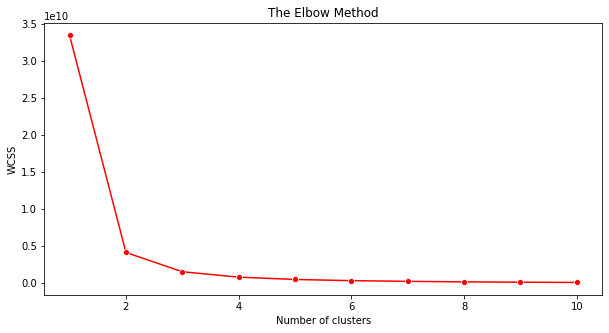

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

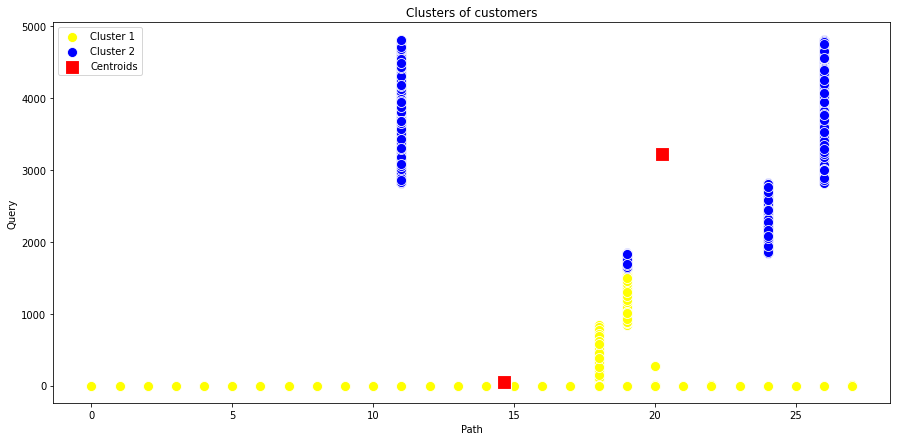

In [10]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s = 100)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s = 100)
sns.scatterplot(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color = 'red', 
    label = 'Centroids',
    s = 200,
    marker = ','
)
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Path')
plt.ylabel('Query')
plt.legend()
plt.show()